In [1]:
import sys 
sys.path.append('..')

from models import DIFDensityEstimator,SoftmaxWeight,LocationScaleFlow
from models import EMDensityEstimator
from targets import Target
%load_ext autoreload
%autoreload 2
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import matplotlib.pyplot as plt

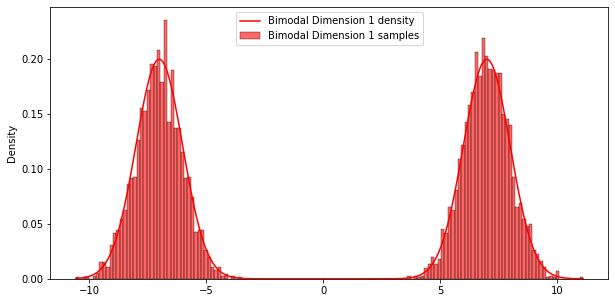

In [2]:
example = "Bimodal Dimension 1"
num_samples = 10000
target = Target(example, num_samples)
target.target_visual()
p, target_log_density, target_samples = target.get_target()

In [3]:
num_samples = target_samples.shape[0]
epochs = 20
loss_values_list_EM = []
K = 2
for _ in range(50):
    EM = EMDensityEstimator(target_samples,K)
    loss_values = EM.train(epochs,visual=False)
    loss_values_list_EM.append(loss_values)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 344.30it/s, loss = 2.1129019260406494]


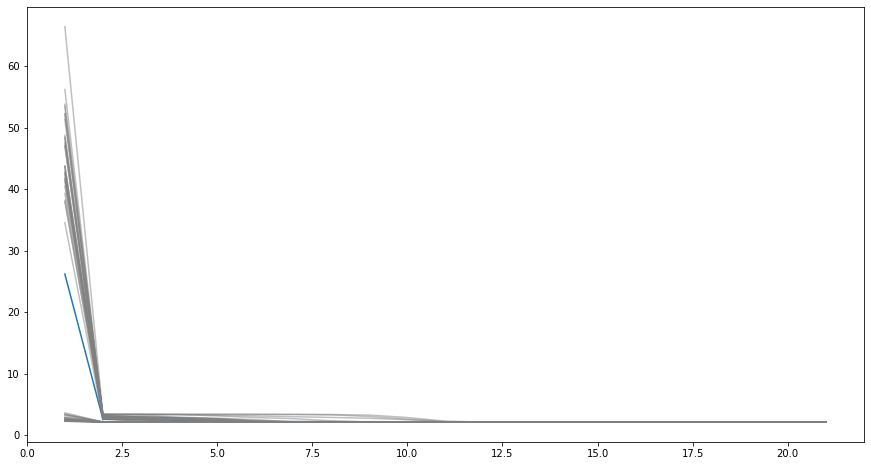

In [4]:
crop = 0
plt.figure(figsize = (15,8))
data = torch.tensor(loss_values_list_EM)
mean = torch.mean(data, dim = 0)
std = torch.std(data, dim =0)
xx = torch.arange(1, data.shape[1]+1)
plt.plot(xx[crop:].numpy(), mean[crop:].numpy())
for i in range(data.shape[0]):
    plt.plot(xx[crop:].numpy(), data[i][crop:].numpy(), alpha = .5, color = 'grey')

In [5]:
num_samples = target_samples.shape[0]
epochs = 3000
loss_values_list_gmm_gradient = []
K = 2
for _ in range(50):
    initial_w = SoftmaxWeight(K, p, mode = 'Constant')
    dif = DIFDensityEstimator(target_samples,K)
    loss_values = dif.train(epochs,visual=False)
    loss_values_list_gmm_gradient.append(loss_values)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:12<00:00, 246.08it/s, loss = 3.1116678714752197]


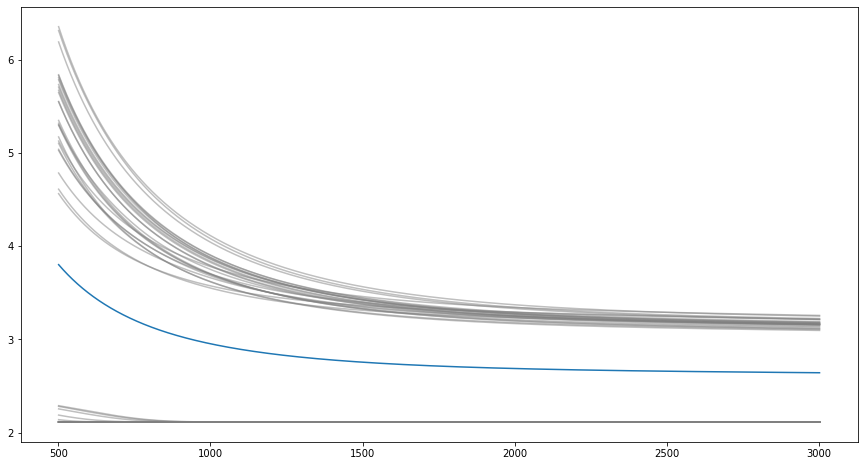

In [6]:
crop = 500
plt.figure(figsize = (15,8))
data = torch.tensor(loss_values_list_gmm_gradient)
mean = torch.mean(data, dim = 0)
std = torch.std(data, dim =0)
xx = torch.arange(1, data.shape[1]+1)
plt.plot(xx[crop:].numpy(), mean[crop:].numpy())
for i in range(data.shape[0]):
    plt.plot(xx[crop:].numpy(), data[i][crop:].numpy(), alpha = .5, color = 'grey')

In [7]:
num_samples = target_samples.shape[0]
epochs = 3000
loss_values_list_gmm_gradient = []
K = 2
for _ in range(50):
    initial_w = SoftmaxWeight(K, p, mode = 'Linear')
    dif = DIFDensityEstimator(target_samples,K)
    loss_values = dif.train(epochs,visual=False)
    loss_values_list_gmm_gradient.append(loss_values)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:12<00:00, 234.39it/s, loss = 2.1129019260406494]


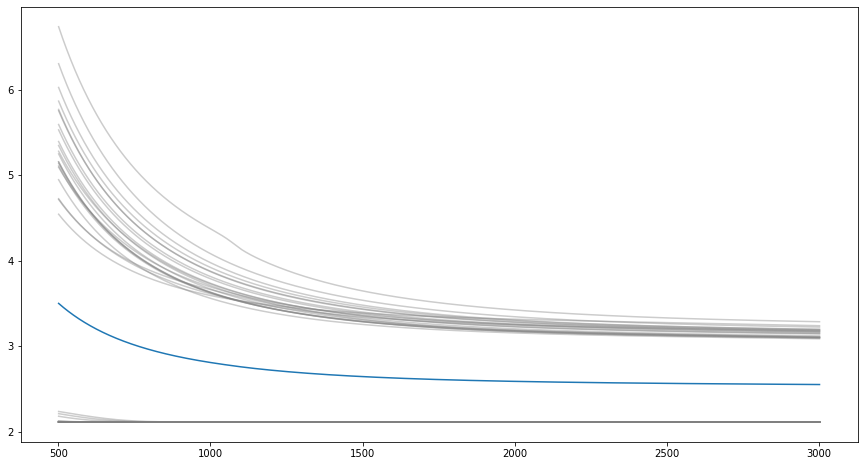

In [8]:
crop = 500
plt.figure(figsize = (15,8))
data = torch.tensor(loss_values_list_gmm_gradient)
mean = torch.mean(data, dim = 0)
std = torch.std(data, dim =0)
xx = torch.arange(1, data.shape[1]+1)
plt.plot(xx[crop:].numpy(), mean[crop:].numpy())
for i in range(data.shape[0]):
    plt.plot(xx[crop:].numpy(), data[i][crop:].numpy(), alpha = .4, color = 'grey')